# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    ...
    1. Tokenized tweet
    ...

    2. Input tweet
    ...
    2. Tokenized tweet
    ...

In [3]:
tweets = []
for i in range(1, 6):
    with open(f"file{i}") as f:
        tweets += f.readlines()
len(tweets)

220

In [4]:
with open("file2") as f:
    for line in f.readlines()[:15]:
        print(line)

Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

Its american tradition bitch

@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

Hey doll! Great I missed True Blood yday boo lol Rt @Fra

1. Input tweet
   
Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

1. Tokenized tweet

Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooze.com

2. Input tweet

Its american tradition bitch

2. Tokenized tweet
   
Its , american , tradition , bitch

3. Input tweet

@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

3. Tokenized tweet

@ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I'm , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones 

4. Input tweet

" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

4. Tokenized tweet

" , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , <--- , " , " , I , tweet , because , I'm , happy , , , I , tweet , because , I'm , free , " , " , LOL , ! , "

5. Input tweet

Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

5. Tokenized tweet

Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy's , done , it , aga , .. , http://tinyurl.com/lb5p6m

6. Input tweet

@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

6. Tokenized tweet

@dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it's , kinda , cool , when , u , get , up , to , speed , . 

7. Input tweet

iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

7. Tokenized tweet

iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki

8. Input tweet

RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

8. Tokenized tweet

RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice, ! , ! , !

9. Input tweet

RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

9. Tokenized tweet

RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing's , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

10. Input tweet

Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)

10. Tokenized tweet

Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

11. Input tweet

Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland

11. Tokenized tweet

Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , in , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

12. Input tweet

@mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both

12. Tokenized tweet

@mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can't , do , both

13. Input tweet

Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv

13. Tokenized tweet

Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tuscon , ) , : , If , Fat , Cat , Records , is , going , to , send , three , bands , from , Scot , .. , http://tinyurl.com/nz6xcv

14. Input tweet

Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)

14. Tokenized tweet

Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2Yy , )

15. Input tweet

Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk

15. Tokenized tweet

Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [5]:
from collections import Counter
from typing import List
import re
from tqdm import trange

class BPETokenizer:
    
    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size


    def _generate_corpus(self, corpus: List[str]):
        initial_chars = Counter()
        frequencies = {}
        for line in corpus:
            words = line.split()
            for word in words:
                initial_chars = initial_chars + Counter(word)
                word = ' '.join(word)
                if word in frequencies:
                    frequencies[word] += 1
                else:
                    frequencies[word] = 1
        return list(initial_chars.keys()), frequencies
    
    def _count_stats(self, corpus):
        pairs = {}
        for word, freq in corpus.items():
            symbols = word.split()
            for i in range(len(symbols)-1):
                c_pair = (symbols[i], symbols[i+1])
                pairs[c_pair] = pairs.get(c_pair, 0) + freq
        return pairs
    
    def _merge_vocab(self, best: str, corpus):
        out = {}
        bigram = re.escape(' '.join(best))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
        for word in corpus:
            w_out = p.sub(''.join(best), word)
            out[w_out] = corpus[word]
        return out
                
    def train(self, corpus: List[str]) -> None:
        init_chars, corpus = self._generate_corpus(corpus)
        self.vocab = init_chars
        for i in trange(self.vocab_size - len(init_chars)):
            pairs = self._count_stats(corpus)
            best = max(pairs, key=pairs.get)
            corpus = self._merge_vocab(best, corpus)
            self.vocab.append(''.join(best))
            
        # self.vocab.sort(key=len, reverse=True)
        self.vocab = ["</UNK>", " "] + self.vocab
        self.vocab_idx = {self.vocab[i]:i for i in range(len(self.vocab))}

    def tokenize(self, text: str) -> List[str]:
        tokens = [0] # 0 is for unknown token
        lb = 0
        rb = 0
        while rb < len(text):
            if text[lb: rb + 1] in self.vocab_idx:
                tokens[-1] = self.vocab_idx[text[lb: rb + 1]]
            else:
                tokens.append(0)
                if lb == rb:
                    lb += 1
                else:
                    lb = rb
                    rb -= 1
            rb += 1
        return tokens
    
    def detokenize(self, tokens: List[int]) -> str:
        out = ""
        for token in tokens:
            out += self.vocab[token]
        return out

In [6]:
a = BPETokenizer(50)
a.train(["I am konstantin and I aboba", "is it correct to do", "do it right now!", "is it", "is it we", "to do", "nower"])
tokens = a.tokenize("I am is kosta!")
print(tokens)
a.detokenize(tokens)

100%|██████████| 32/32 [00:00<00:00, 6679.83it/s]

[2, 1, 27, 1, 21, 1, 28, 8, 9, 3, 19]


'I am is kosta!'

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [7]:
tweets[0]

'@anitapuspasari waduh..\n'

In [8]:
avg_values = []
vocab_sizes = [250, 500, 750, 1000]
for vocab_size in vocab_sizes:
    c_tokenizer = BPETokenizer(vocab_size)
    c_tokenizer.train(tweets)
    avg_values.append(sum([len(c_tokenizer.tokenize(tweet)) for tweet in tweets]) / len(tweets))


 43%|████▎     | 36/84 [00:00<00:00, 113.58it/s]

100%|██████████| 834/834 [00:06<00:00, 137.96it/s]


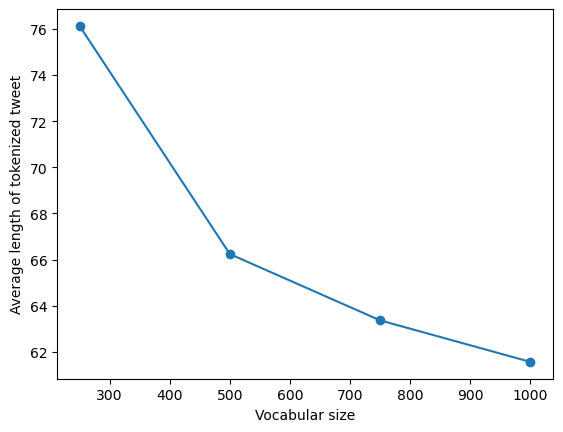

In [9]:
import matplotlib.pyplot as plt

plt.ylabel("Average length of tokenized tweet")
plt.xlabel("Vocabular size")
plt.plot(vocab_sizes, avg_values)
plt.scatter(vocab_sizes, avg_values)
plt.show()

The bigger vocabular size the less average length of token. It is obvious because even adding one token that is bigger can reduce at least one word in token size. Thus, can affect average length. But the vocab size we have the less effect will it add, because last added tokens are not so popular.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

I used mongolian language dataset. It is corpus from news from some channel in Mongolia. Taken from https://github.com/tugstugi/mongolian-nlp (https://yadi.sk/d/z5e3MVnKvFvF6w?fbclid=IwAR2wRJ4fRRMSDI8rhbNLdU2n_RiK08hU2rKwXwI7rc6JN2YNTeTna8xOOlg direct link). I used only part of `news_01.txt` to make it less than several megabytes.

In [10]:
texts = []
with open("news/news_01.txt", "r") as f:
    texts += f.readlines()
texts[:10]

['\ufeffүнэд нөлөөлөх учиргүй Өнөөдөр манай улсын иргэдийн амжиргааны түвшин маш доогуур байгаа. Энэ нь цалин хөлстэй холбоотой аж. Хөдөлмөр эрхэлж буй иргэд цалингаас цалингийн хооронд амьдарч байгаа ба сүүлийн үед юмны үнэ нэмэгдэх болсон нь нийгэмд санхүүгийн хүнрэлийг бий болгоод буй. Учир нь бараа бүтээгдэхүүний үнэ нэмэгдээд байдаг боловч цалин хөлсний үнэ огт нэмэгдэхгүй бөгөөд тэрхүү үнэ нь нэмэгдсэн бараа бүтээгдэхүүнийг худалдан авах хэрэглээгээ хангахад сарын цалин нь хаанаа ч хүрэхгүй байгаа юм. Он гарсаны дараа тэтгэвэр, тэтгэмжийн хэмжээг бага хувиар нэмсэн. Гэхдээ нэмлээ гээд нэх шалисан юмгүй байгаад иргэд бухимдалтай хандаж буй юм. Түүнчлэн хамгийн хариуцлагатай, өндөр мэдлэг боловсрол шаардагддаг мэргэжлийн нэг болох багш нарын цалин нэмэгдэхгүй хэвээр байсаар буй. Багш нар хүүхдийн хүмүүжил болоод мэдлэг боловсролд ихээхэн анхаарал хандуулж ажилладаг нэгэн. Харин тэдний авч буй цалин нь хийсэн хөдөлмөрөөсөө бага байгаа аж. Нэг ёсондоо багш нарын хөдөлмөрийг үнэлж чад

In [11]:
len(texts)

200

In [12]:
sum(len(t) for t in texts[:100])

163357

In [13]:
avg_values = []
vocab_sizes = [150, 300, 600, 1000, 1500]
for v_size in vocab_sizes:
    mongol_tokenizer = BPETokenizer(v_size)
    mongol_tokenizer.train(texts[:100])
    avg_values.append(sum([len(mongol_tokenizer.tokenize(t)) for t in texts[:100]]) / 100)


100%|██████████| 1358/1358 [00:44<00:00, 30.51it/s]


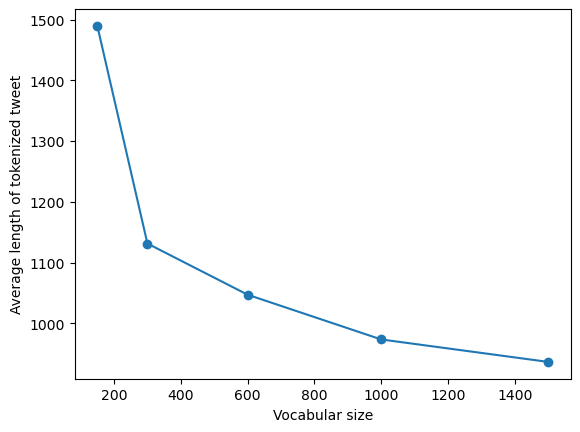

In [14]:
import matplotlib.pyplot as plt

plt.ylabel("Average length of tokenized tweet")
plt.xlabel("Vocabular size")
plt.plot(vocab_sizes, avg_values)
plt.scatter(vocab_sizes, avg_values)
plt.show()

In [15]:
mongol_tokenizer.vocab[-100:]

['хаан',
 'хэмжээг',
 'иар',
 'Гэхдээ',
 'мэргэжлийн',
 'адаг',
 'үйлдэл',
 'өөрс',
 'Үндэсний',
 'өөрчл',
 'Ч.Гэр',
 'Ч.Гэрэл',
 'Ч.Гэрэлтуяа',
 'тохиолд',
 'байшин',
 'үсэг',
 'орны',
 'бичиг',
 'байгууллага,',
 'дөрв',
 'алж',
 'эхэлсэн',
 'хугацаанд',
 'Сонг',
 'дээрх',
 'өнгөр',
 'сурвалж',
 'эрүүл',
 'шилж',
 'холбог',
 'хийл',
 'тайл',
 'бүрд',
 'ёстой',
 'ьсан',
 'дад',
 'салбарын',
 'байн',
 'сонирхол',
 'de',
 'бололтой',
 'оноос',
 'Их',
 'Наран',
 'оно',
 'оролцох',
 '35',
 'Д.Жан',
 'Д.Жансэн',
 'Д.Жансэнм',
 'турш',
 'хэргийн',
 'хэсэг',
 'сургуулийн',
 'цах',
 'тарх',
 'зураг',
 'Энэхүү',
 'аль',
 'гээс',
 'санд',
 'этг',
 'машин',
 'АН',
 'мэдээлэл,',
 'байгуулж',
 'охин',
 'дүгн',
 'хяналтын',
 'шаг',
 'ац',
 'лиг',
 'орчны',
 'мэдээллийг',
 'ажлыг',
 'гэц',
 'лэж',
 'хэрэгсэл',
 'хэсэгт',
 'чу',
 'наад',
 'Сүх',
 'Сүхбаатар',
 'өвчнөөс',
 'цогцолбор',
 'цэн',
 'мансуур',
 'байгуулах',
 'хав',
 '"Сэй',
 'ОХ',
 'оёлын',
 'хамтлагийн',
 'мэдрэл',
 'ядар',
 'вшин',
 'бага

average length of sentence is longer and also has more structured and official style. That's why a lot of words can be reduced using tokens. In addition, this dataset is corpus of news, which use official language with a lot of repetitions of tokens 